# 시계열 분석의 모든 것

> @jhbale11


**시계열 데이터**란 일정한 시간동안 수집된, 일련의 순차적인 순서를 가지는 데이터셋의 집합으로 시간에 관해 순서가 매겨져 있으며 연속한 관측치는 서로 상관관계를 가지고 있다는 특징을 가지고 있습니다.

POS(Point Of Sales) 구매 자료, 일일 코스피 주식 가격, 월별/분기별/연도별 특정 사건의 수치 등 일상의 많은 데이터가 시계열 데이터이기에 **"시계열 데이터에 대한 End-To-End 분석 방법론"**을 알고 이를 적용하는 것은 그것이 어떤 도메인의 데이터든 상관없이 분석의 가장 기초적인 단계가 될 것입니다.

이 프로젝트에서는 Pandas, Matploblib, Plotly, Statsmodels 라이브러리를 사용하여 시계열 데이터를 분석하는 모든 방법을 정리하고 실습해보고자 합니다. 시계열 데이터를 처음 접하는 초심자와 어느 정도 pandas, visualization library, statsmodel을 사용할 줄 아는 중급자들에게 좋은 가이드가 되었으면 좋겠습니다.

# 사용 라이브러리

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

- <a href='#1'>1. Date와 Time의 이해</a>
    - <a href='#1.1'>1.1 시계열 데이터 불러오기</a>
    - <a href='#1.2'>1.2 시계열 데이터 전처리</a>
    - <a href='#1.3'>1.3 데이터 시각화</a>
    - <a href='#1.4'>1.4 Shifting과 Lagging</a>
    - <a href='#1.5'>1.5 Resampling</a>
- <a href='#2'>2. 금융데이터와 통계학</a>
    - <a href='#2.1'>2.1 비율 변화(Percent change)</a>
    - <a href='#2.2'>2.2 주식 수익률(Stock returns)</a>
    - <a href='#2.3'>2.3 절댓값 변화(Absolute change in successive rows)</a>
    - <a href='#2.4'>2.4 두 시계열 데이터 비교</a>
    - <a href='#2.5'>2.5 윈도우 함수(Window functions)</a>
    - <a href='#2.6'>2.6 OHLC 차트</a>
    - <a href='#2.7'>2.7 Candlestick 차트</a>
    - <a href='#2.8'>2.8 자기상관과 편자기상관(Autocorrelation and Partial Autocorrelation)</a>
- <a href='#3'>3. 시계열 데이터 분해(ecomposition)와 랜덤 워크(Random Walks)</a>
    - <a href='#3.1'>3.1 트렌드(Trends), 계절성(Seasonality)과 노이즈(Noise)</a>
    - <a href='#3.2'>3.2 화이트 노이즈(White Noise)</a>
    - <a href='#3.3'>3.3 랜덤 워크(Random Walk)</a>
    - <a href='#3.4'>3.4 정상성(Stationarity)</a>
- <a href='#4'>4. statsmodels 사용하기</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
        - <a href='#4.6.3'>4.6.3 Dynamic Factor models</a>

# <a id='1'>1. Date와 Time의 이해</a>

## <a id='1.1'>1.1 시계열 데이터 불러오기</a>

### 금융 시계열 데이터를 불러오는 방법

일반적으로 많이 사용하는 라이브러리는 아래와 같습니다.
- yfinance
- FinanceDataReader

yfinance는 많은 국가의 주식 데이터를 불러오는데 효과적이며, FinanceDataReader는 한국거래소에 상장된 주식 종목을 불러올 경우 유용합니다.

In [2]:
import yfinance as yf


samsung = yf.download('005930.KS',
                      start='2019-01-01',
                      end='2022-02-28',
                      progress=False)
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,35331.628906,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,34283.085938,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,34146.312500,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,35331.628906,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,34738.976562,12756554
...,...,...,...,...,...,...
2022-02-21,74300.0,74300.0,74300.0,74300.0,74300.000000,0
2022-02-22,74300.0,74300.0,74300.0,74300.0,74300.000000,0
2022-02-23,74300.0,74300.0,74300.0,74300.0,74300.000000,0


In [3]:
import FinanceDataReader as fdr 

samsung1 = fdr.DataReader(symbol='005930', start='2019') # 삼성전자, 2019년~현재
samsung1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2022-02-25,72100,72600,71900,71900,13168484,0.005594
2022-02-28,71100,72100,71000,72100,17781783,0.002782
2022-03-02,72300,72400,71500,71700,12481430,-0.005548


## <a id='1.2'>1.2 시계열 데이터 전처리</a>

### 시계열 데이터 전처리

yfinance와 FinanceDataReader로 불러온 데이터는 대체로 결측치가 없습니다.
데이터를 분석하기 전에 결측치를 확인할 필요가 있습니다.

In [4]:
samsung.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## <a id='1.3'>1.3 데이터 시각화</a>

DataFrame에 바로 plot 함수를 사용하여 쉽게 시각화할 수 있습니다. Datetime Index의 경우 Indexing을 통해 원하는 연도의 그래프만을 그리는 것도 가능합니다.

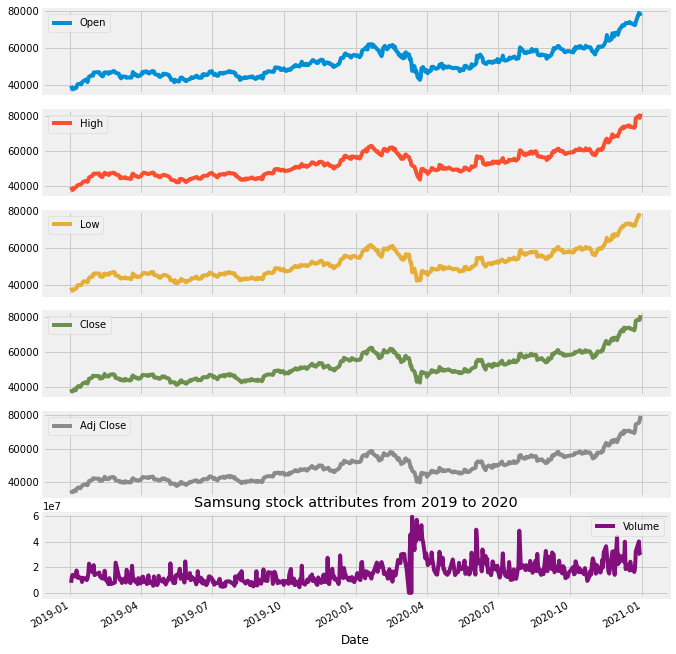

In [5]:
samsung['2019':'2020'].plot(subplots=True, figsize=(10,12))
plt.title('Samsung stock attributes from 2019 to 2020')
plt.show()

## <a id='1.7'>1.4 Shifting과 Lagging</a>

시계열 데이터를 분석할 때 가장 많이 사용하는 방법은 원하는 기간만큼 데이터를 Shift하거나, Lag하는 방식입니다. 아래와 같은 방법을 통해 간단하게 Shifting과 Lagging할 수 있습니다.

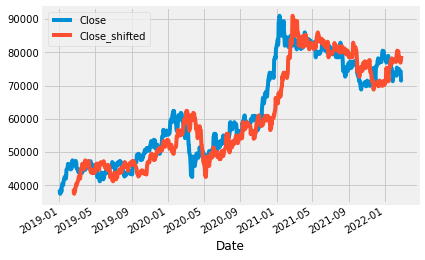

In [6]:
samsung["Close"].plot(legend=True)
shifted = samsung["Close"].shift(30).plot(legend=True)
shifted.legend(['Close','Close_shifted'])
plt.show()

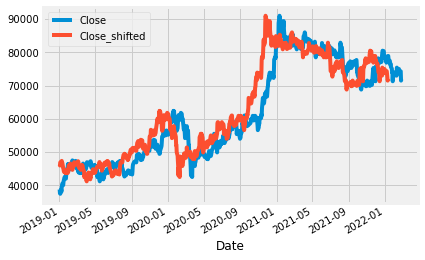

In [7]:
samsung["Close"].plot(legend=True)
shifted = samsung["Close"].shift(-30).plot(legend=True)
shifted.legend(['Close','Close_shifted'])
plt.show()

## <a id='#1.8'>1.8 Resampling</a>
**Upsampling** - low frequency에서 high frequency(Monthly 에서 daily frequency)로 데이터를 Sampling하는 방법입니다. 결측치를 채우거나 보간하는(Interpolate) 방법을 포함합니다.

**Downsampling** - high frequency에서 low frequency(Weekly 에서 monthly frequency)로 데이터를 Sampling하는 방법입니다. 존재하는 데이터를 집계하는(Aggregate) 방법을 포함합니다.

In [8]:
# resampling(downsampling) 전에 Shape을 확인합니다.
samsung.shape

(778, 6)

In [9]:
# daily frequency에서 3 day frequency로 mean함수를 통해 집계합니다.
samsung_ds = samsung.resample('3D').mean()
samsung_ds.shape

(384, 6)

# <a id='2'>2. 금융데이터와 통계학</a>

## <a id='2.1'>2.1 비율 변화(Percent change)</a>

이전 날에서의 비율 변화를 아래와 같은 방식으로 생성할 수 있습니다.

<AxesSubplot:xlabel='Date'>

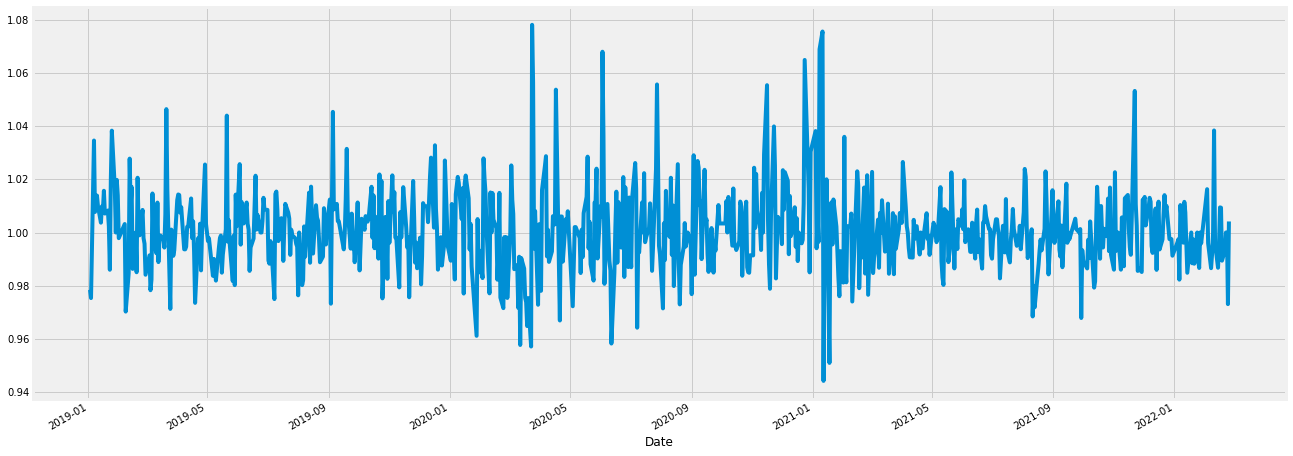

In [10]:
samsung['Change'] = samsung.High.div(samsung.High.shift())
samsung['Change'].plot(figsize=(20,8))

## <a id='2.2'>2.2 주식 수익률(Stock returns)</a> 

수익률은 변화율에서 1을 뺀 후 100을 곱해서 구할 수 있습니다.

변화율이 1.06라면, 수익율은 $(1.06 - 1)*100 = 6$이라고 구할 수 있습니다. 

<AxesSubplot:xlabel='Date'>

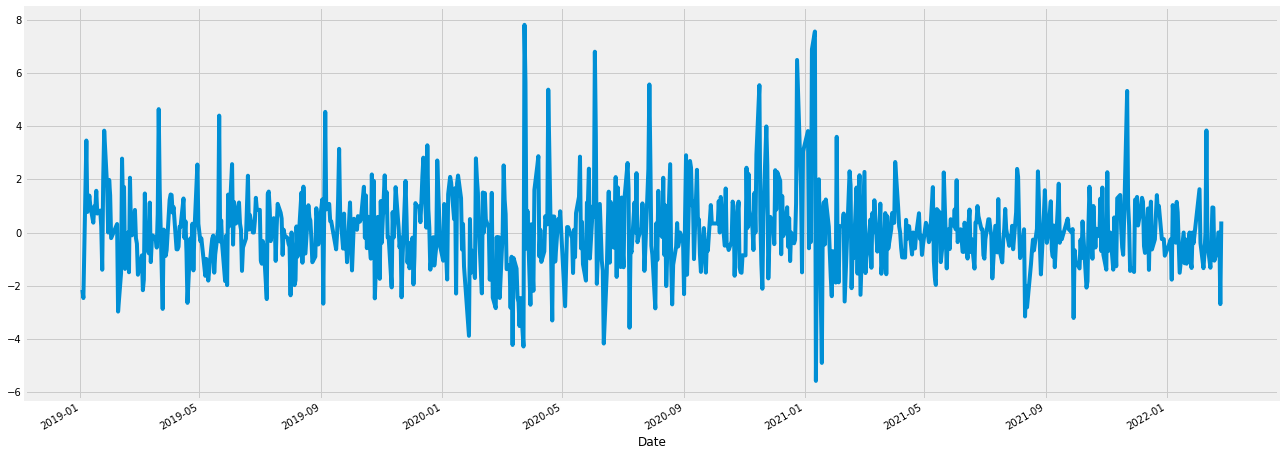

In [11]:
samsung['Return'] = samsung.Change.sub(1).mul(100)
samsung['Return'].plot(figsize=(20,8))

아래와 같은 방식으로 `pct_change` 함수를 통해 바로 구할 수도 있습니다.

<AxesSubplot:xlabel='Date'>

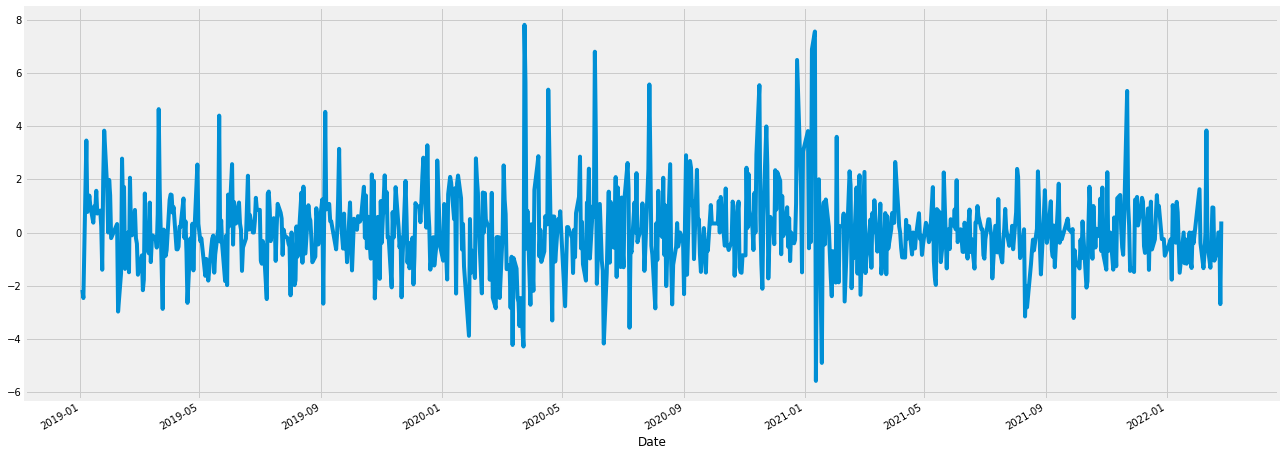

In [12]:
samsung.High.pct_change().mul(100).plot(figsize=(20,8)) # Another way to calculate returns

## <a id='2.3'>2.3 절댓값 변화(Absolute change in successive rows)</a>

`diff`는 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드입니다.
`diff` 함수를 사용하여 이어지는 열에서의 변화의 절댓값을 구할 수 있습니다.

<AxesSubplot:xlabel='Date'>

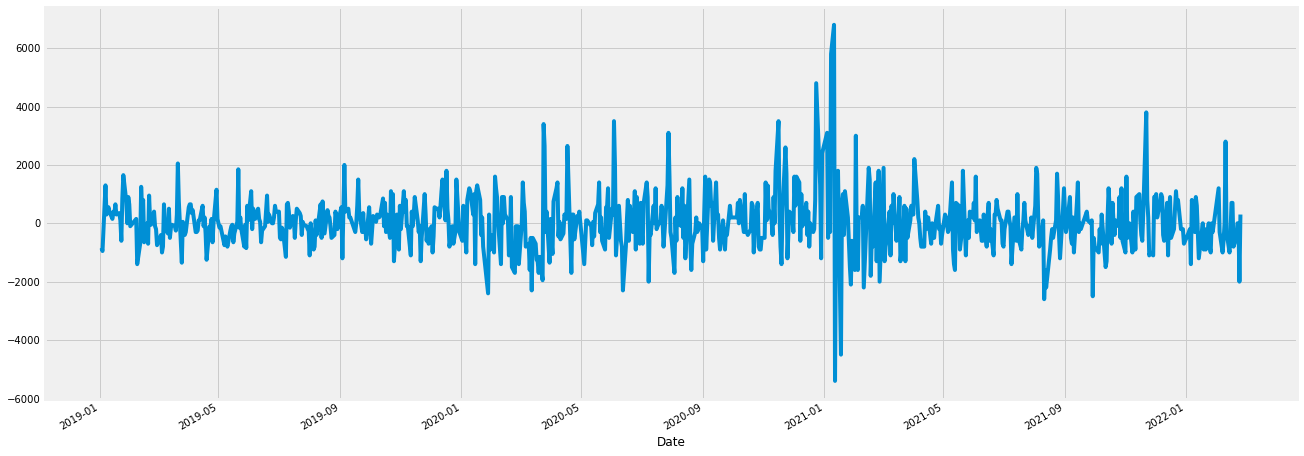

In [13]:
samsung.High.diff().plot(figsize=(20,8))

## <a id='2.4'>2.4 두 시계열 데이터 비교</a> 

두 시계열 데이터를 정규화를 통해 비교하도록 하겠습니다. 시작점을 동일하게 맞춰준다면 두 시계열 데이터의 비교가 가능할 것입니다.

In [14]:
hynix = yf.download('000660.KS',
                      start='2019-01-01',
                      end='2022-02-28',
                      progress=False)
hynix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61300.0,61400.0,60000.0,60600.0,58636.468750,1934295
2019-01-03,60200.0,60300.0,57500.0,57700.0,55830.433594,3337621
2019-01-04,57500.0,58500.0,56700.0,58300.0,56410.992188,3388087
2019-01-07,59000.0,59700.0,58400.0,58700.0,56798.031250,2273750
2019-01-08,57900.0,60500.0,57600.0,59200.0,57281.832031,3062192
...,...,...,...,...,...,...
2022-02-21,131500.0,131500.0,131500.0,131500.0,131500.000000,0
2022-02-22,131500.0,131500.0,131500.0,131500.0,131500.000000,0
2022-02-23,131500.0,131500.0,131500.0,131500.0,131500.000000,0


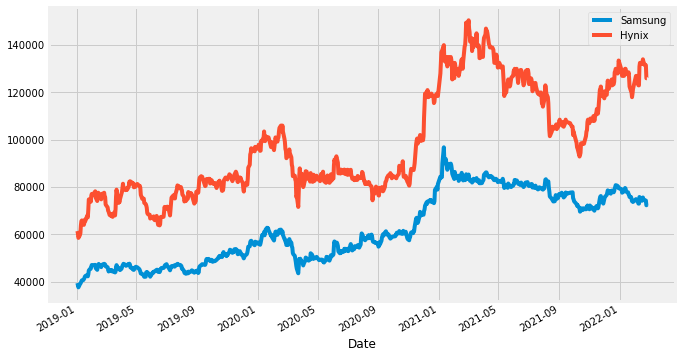

In [15]:
# Plotting before normalization

plt.figure(figsize=(10,6))
samsung.High.plot()
hynix.High.plot()
plt.legend(['Samsung','Hynix'])
plt.show()

Normalization은 아래와 같이 쉽게 할 수 있습니다. samsung 주식과 hynix 주식을 정규화하여 비교하고 싶을 경우, 모든 최고가 데이터를 첫번째 시작일의 최고가 데이터로 나눈 후 100을 곱하는 방식입니다.

```python
samsung.High.div(samsung.High.iloc[0]) # 첫번째 최고가 데이터로 모든 데이터를 나눕니다.
samsung.High.div(samsung.High.iloc[0]).mul(100) # 100을 곱합니다.
```

In [16]:
samsung.High.div(samsung.High.iloc[0])

Date
2019-01-02    1.000000
2019-01-03    0.978426
2019-01-04    0.954315
2019-01-07    0.987310
2019-01-08    0.994924
                ...   
2022-02-21    1.885787
2022-02-22    1.885787
2022-02-23    1.885787
2022-02-24    1.835025
2022-02-25    1.842640
Name: High, Length: 778, dtype: float64

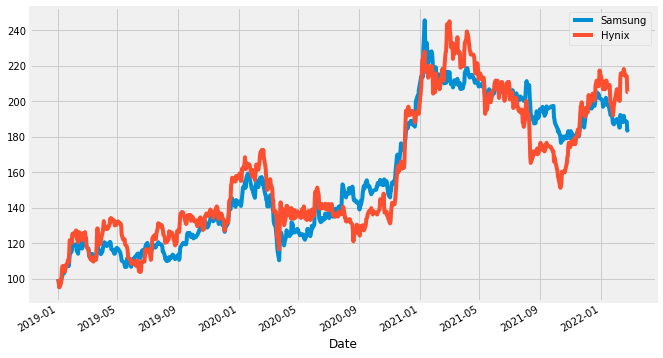

In [17]:
# Normalizing and comparison
# Both stocks start from 100

plt.figure(figsize=(10,6))
normalized_samsung = samsung.High.div(samsung.High.iloc[0]).mul(100)
normalized_hynix = hynix.High.div(hynix.High.iloc[0]).mul(100)
normalized_samsung.plot()
normalized_hynix.plot()
plt.legend(['Samsung','Hynix'])
plt.show()

정규화를 통해 두 시계열 데이터를 비교하면서 삼성전자 주가와 하이닉스 주가의 패턴이 매우 유사함을 알 수 있습니다.

## <a id='2.5'>2.5 윈도우 함수(Window functions)</a>
**윈도우 함수(Window functions)** 는 기간을 정해서 계산하고자 할 때 사용하는 함수입니다.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

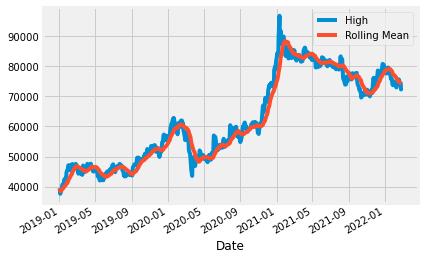

In [18]:
# Rolling window functions
rolling_samsung = samsung.High.rolling('30D').mean()
samsung.High.plot()
rolling_samsung.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

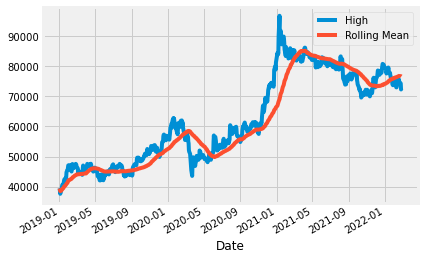

In [19]:
# Rolling window functions
rolling_samsung = samsung.High.rolling('90D').mean()
samsung.High.plot()
rolling_samsung.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

90일을 기준으로 Rolling한 그래프가 더 부드러운 형태를 가지는 것을 확인할 수 있습니다.

**Expanding**은 윈도우 방법의 하나로, 이전의 모든 값을 더하는 결과를 반환합니다.

In [20]:
samsung.High.expanding()

Expanding [min_periods=1,center=False,axis=0,method=single]

In [21]:
samsung_mean = samsung.High.expanding().mean()
samsung_mean

Date
2019-01-02    39400.000000
2019-01-03    38975.000000
2019-01-04    38516.666667
2019-01-07    38612.500000
2019-01-08    38730.000000
                  ...     
2022-02-21    62213.824289
2022-02-22    62229.419355
2022-02-23    62244.974227
2022-02-24    62257.915058
2022-02-25    62271.208226
Name: High, Length: 778, dtype: float64

In [22]:
samsung_std = samsung.High.expanding().std()
samsung_std

Date
2019-01-02             NaN
2019-01-03      601.040764
2019-01-04      900.462844
2019-01-07      759.797122
2019-01-08      708.519583
                  ...     
2022-02-21    14722.072563
2022-02-22    14718.963284
2022-02-23    14715.844890
2022-02-24    14710.783259
2022-02-25    14705.988811
Name: High, Length: 778, dtype: float64

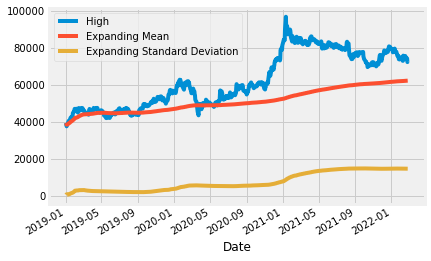

In [23]:
# Expanding window functions
samsung.High.plot()
samsung_mean.plot()
samsung_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.6'>2.6 OHLC 차트</a>
OHLC 차트는 특정 기간동안의 Open, High, Low, Close 가격을 보여주는 차트입니다.

OHLC 차트의 y축은 가격이며 x축은 시간입니다. 특정 날짜에 시가와 종가를 한눈에 보고자 할때 많이 사용하는 차트이며, OHLC 차트의 색을 통해 시장이 Bullsih(종가가 시가보다 높은 경우)되었는지 Bearish(종가가 시가보다 낮은 경우)되었는지 판단할 수 있습니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [24]:
# OHLC chart of June 2008
trace = go.Ohlc(x=samsung['06-2019'].index,
                open=samsung['06-2019'].Open,
                high=samsung['06-2019'].High,
                low=samsung['06-2019'].Low,
                close=samsung['06-2019'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [25]:
# OHLC chart of 2019
trace = go.Ohlc(x=samsung['2019'].index,
                open=samsung['2019'].Open,
                high=samsung['2019'].High,
                low=samsung['2019'].Low,
                close=samsung['2019'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [26]:
# OHLC chart of 2019-current
trace = go.Ohlc(x=samsung.index,
                open=samsung.Open,
                high=samsung.High,
                low=samsung.Low,
                close=samsung.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

 ## <a id='2.7'>2.7 Candlestick 차트</a>

Candlestick 차트는 시가, 종가, 최고가, 최저가와 같은 가격에 대한 정보를 양초와 같은 심볼을 사용하여 표현합니다.
Real Body라고 알려져있는 중심 사각형은 시가와 종가의 범위를 나타냅니다. Real Body의 위아래로 있는 연장선은 Lower Upper Shadow입니다. 최고가와 최저가의 범위를 나타냅니다.

OHLC 차트와 마찬가지로 Candlestick 차트를 통해 시장이 Bullish되었는지 Bearish되었는지 심볼의 색상을 통해 알 수 있습니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [27]:
# Candlestick chart of march 2019
trace = go.Candlestick(x=samsung['03-2019'].index,
                open=samsung['03-2019'].Open,
                high=samsung['03-2019'].High,
                low=samsung['03-2019'].Low,
                close=samsung['03-2019'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [28]:
# Candlestick chart of 2019
trace = go.Candlestick(x=samsung['2019'].index,
                open=samsung['2019'].Open,
                high=samsung['2019'].High,
                low=samsung['2019'].Low,
                close=samsung['2019'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [29]:
# Candlestick chart of 2019-current
trace = go.Candlestick(x=samsung.index,
                open=samsung.Open,
                high=samsung.High,
                low=samsung.Low,
                close=samsung.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## <a id='2.8'>2.8 자기상관(Autocorrelation)과 편자기상관(Partial Autocorrelation)</a>
* **Autocorrelation** - Correlation은 일반적으로 두 변수 사이의 관계를 -1~1의 값으로 표현하는 척도입니다. -1에 가까울 수록 음의 상관관계가, +1에 가까울수록 양의 상관관계가 존재한다고 볼 수 있습니다. Autocorrelation이란 Correlation에 Auto 개념이 추가된 것으로 시계열적인 관점으로 보았을 때 Time shifted된 자기 자신과의 상관 관계를 의미합니다. autocorrelation function (ACF)은 다양한 lag에서 데이터가 어떤 자기상관을 가지고 있는지 반환합니다.

* **Partial Autocorrelation** - 부분 상관(Partial Correlation) 이란 두 확률변수 X와 Y에 의해 다른 모든 변수들에 나타난 상관 관계를 설명하고 난 이후에도 여전히 남아있는 상관 관계라고 정의할 수 있습니다. 따라서 부분자기상관함수(PACF) 는 자기 상관 함수와 마찬가지로 시계열 관측치 간 상관 관계 함수이고, 시차 k에서의 k 단계만큼 떨어져 있는 모든 데이터 점들 간의 순수한 상관 관계를 의미합니다.

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

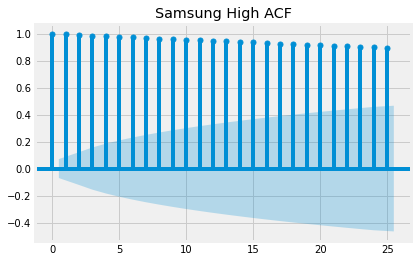

In [30]:
# Autocorrelation of humidity of San Diego
plot_acf(samsung["High"],lags=25,title="Samsung High ACF")
plt.show()

## Partial Autocorrelation

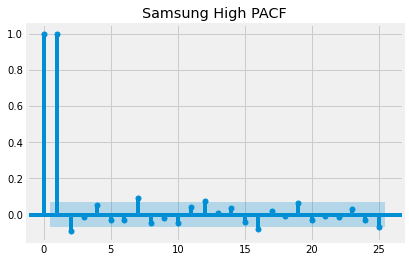

In [31]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(samsung["High"],lags=25,title="Samsung High PACF")
plt.show()

편자기상관 함수에서는 0번째, 1번째 Lag만이 통계적으로 유의하다고 볼 수 있습니다.

# <a id='3'>3. 시계열 데이터 분해(ecomposition)와 랜덤 워크(Random Walks)</a>

## <a id='3.1'>3.1. 트렌드(Trends), 계절성(Seasonality)과 노이즈(Noise)</a>

Trend와 Seasonality, Noise는 시계열 데이터를 구성하고 있는 성분입니다.
* Trend - 데이터가 가지고 있는 점진적인 기울기, 변화 방향
* Seasonality - 주기적으로 나타나는 패턴
* Noise - Outliers나 결측치

<AxesSubplot:xlabel='Date'>

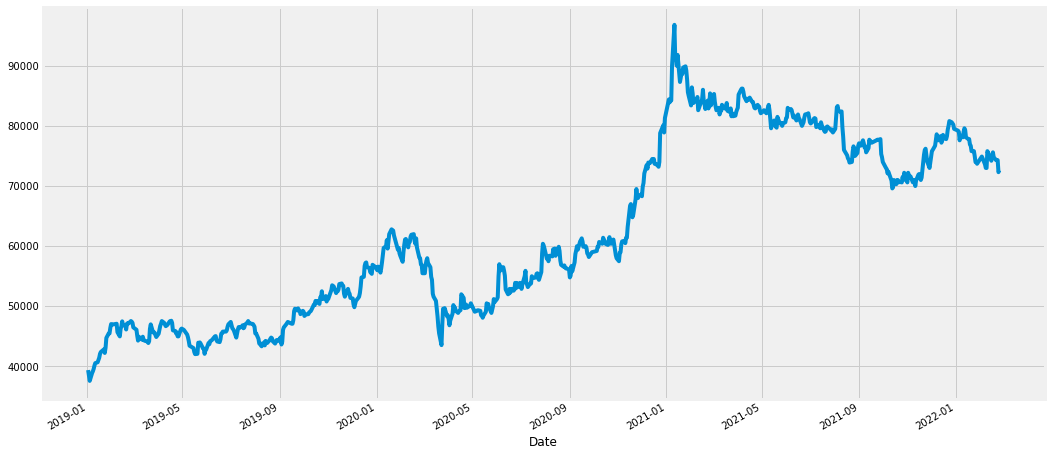

In [32]:
# Let's take Samsung stocks High for this
samsung["High"].plot(figsize=(16,8))

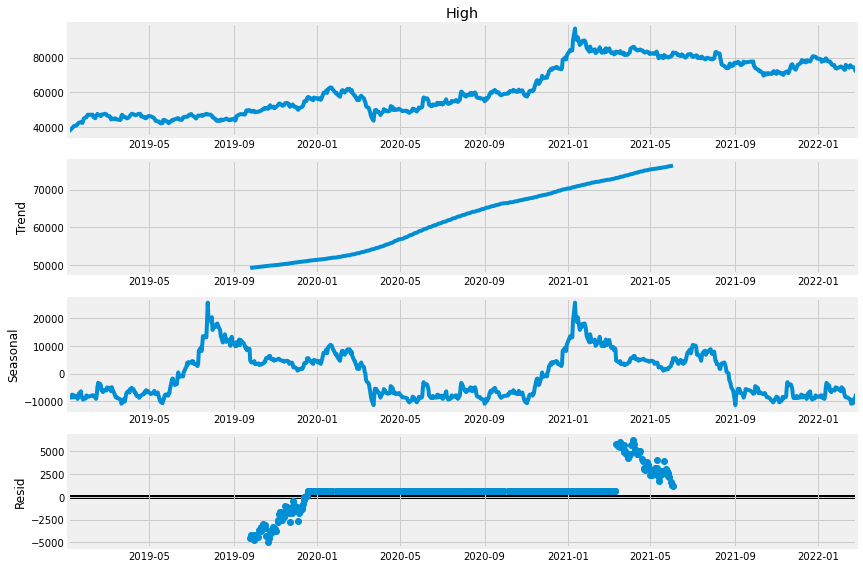

In [33]:
# Now, for decomposition...
rcParams['figure.figsize'] = 12, 8
decomposed_samsung_volume = sm.tsa.seasonal_decompose(samsung["High"],freq=360) # The frequncy is annual
figure = decomposed_samsung_volume.plot()
plt.show()

위의 분해를 통해 아래와 같은 정보를 유추할 수 있습니다.
* 확연한 우상향 트렌드를 확인할 수 있습니다.
* 일정한 계절성 변화를 확인할 수 있습니다.
* Outlier와 결측치에 대한 분포가 고르지 않습니다.

## <a id='3.2'>3.2. 화이트 노이즈(White noise)</a>
화이트 노이즈(White noise)는 아래와 같은 특징을 가지고 있습니다.
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

평균과 분산이 일정해야 하며 모든 lag에 대해 자기상관이 없어야 합니다. 꽤 많은 금융 데이터들이 이러한 화이트 노이즈의 형태를 가지고 있습니다.

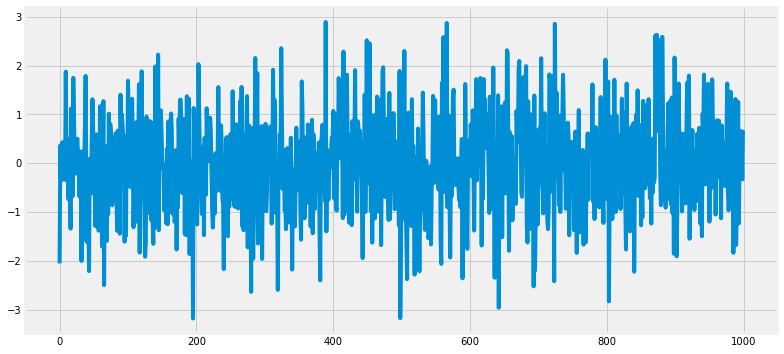

In [34]:
# Plotting white noise
rcParams['figure.figsize'] = 12, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

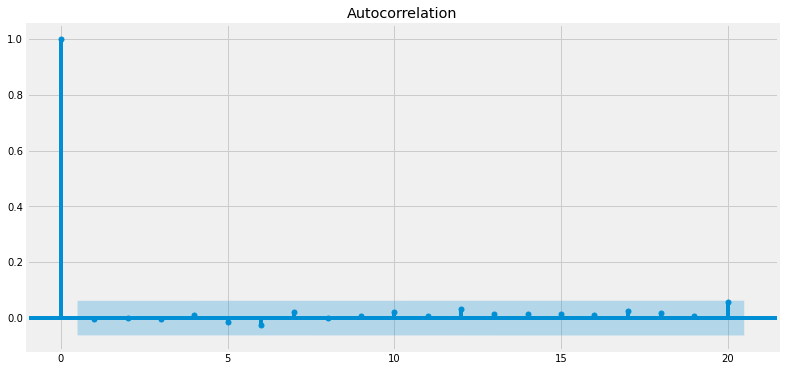

In [35]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

## <a id='3.3'>3.3. 랜덤 워크(Random Walk)</a>
랜덤 워크 이론(Random Walk Theory)는 주가가 랜덤하게 움직인다는 내용입니다. 주가에는 이미 반영될 수 있는 정보가 모두 반영되어 있고, 미래 주가는 랜덤하게 형성되기 때문에 투자자는 최대한 많은 양의 종목을 분산하여 장기간에 걸쳐서 투자해야 한다는 결론에 이르게 되는 이론입니다.

주가의 변동은 미래 기대치에 대한 불편 추정치(Unbiased Estimate) 값을 가지고 있기 때문에 주가가 변하는 것은 새롭게 발생하는 정보에 의해서만 일어나는 것이며 다음과 같은 수식으로 표현할 수 있습니다.

Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

랜덤 워크를 예측할 수 없는 이유는 노이즈가 랜덤하기 때문이며, Drift(μ)를 가진 랜덤 워크는 아래와 같이 표현 가능합니다. (Random Walk with Drift(drift(μ) is zero-mean))
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>

랜덤워크에 대한 Regression test는 아래와 같이 가능합니다. 회귀 테스트와 디키퓰러 테스트가 가능합니다.
#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:

#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:

#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
**Augmented Dickey–Fuller test (ADF)**  즉 **ADF 검정**은 시계열 데이터가 정상성을 가지는지 테스트하는 방법입니다. ADF 검정은 1차 누적에 의한 확률적 추세 뿐 아니라 2차항으로 나타나는 결정론적 추세를 포함하는 시계열에 대해서 단위 근 검정을 할 수 있도록 DF 검정을 일반화 한 것으로, 검정 통계량의 값을 통해 귀무 가설을 채택할 것인지 버릴 것인지 선택합니다.

In [36]:
# Augmented Dickey-Fuller test on volume of samsung and hynix
adf = adfuller(samsung["Volume"])
print("p-value of samsung: {}".format(float(adf[1])))
adf = adfuller(hynix["Volume"])
print("p-value of hynix: {}".format(float(adf[1])))

p-value of samsung: 1.147705339641952e-05
p-value of hynix: 2.5093819370306997e-12


##### As samsung has p-value 0.000011477 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
##### Now hynix has p-value 2.5093819370306997e-12 which is less than 0.05, null hypothesis is rejected and this is not a  random walk.

### Generating a random walk

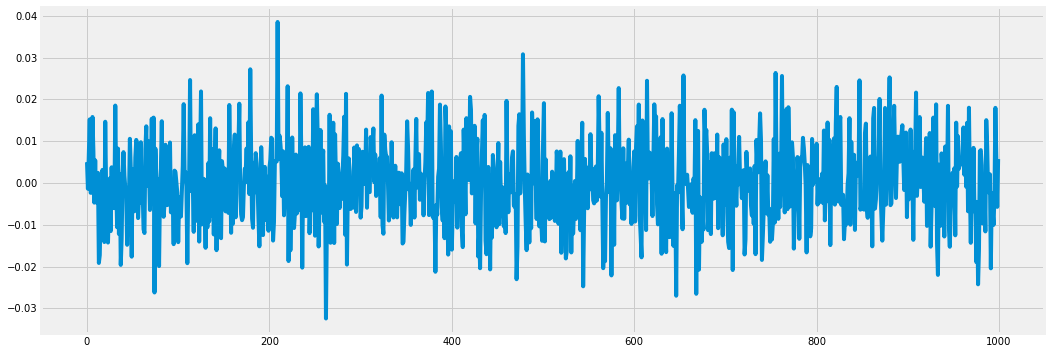

In [37]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [38]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

## <a id='3.4'>3.4 정상성(Stationarity)</a>

정상성을 가지는 데이터는 1) 시간의 추이와 관계없이 평균이 불변하며, 2) 시간의 추이와 관계 없이 분산이 불변하며, 3) 두 시점 간의 공분산이 기준 시점과 무관하다는 특징을 가지고 있습니다.

위에서 decomposed된 주가 데이터를 통해 정상성을 확인할 수 있습니다.

<AxesSubplot:xlabel='Date'>

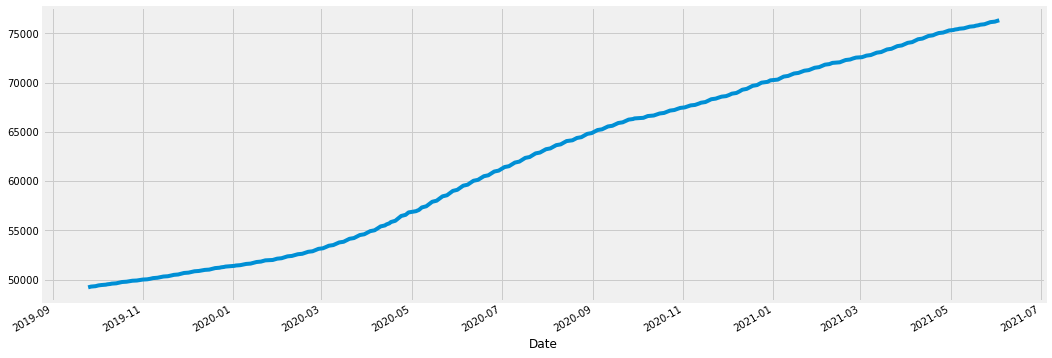

In [39]:
# The original non-stationary plot
decomposed_samsung_volume.trend.plot()

<AxesSubplot:xlabel='Date'>

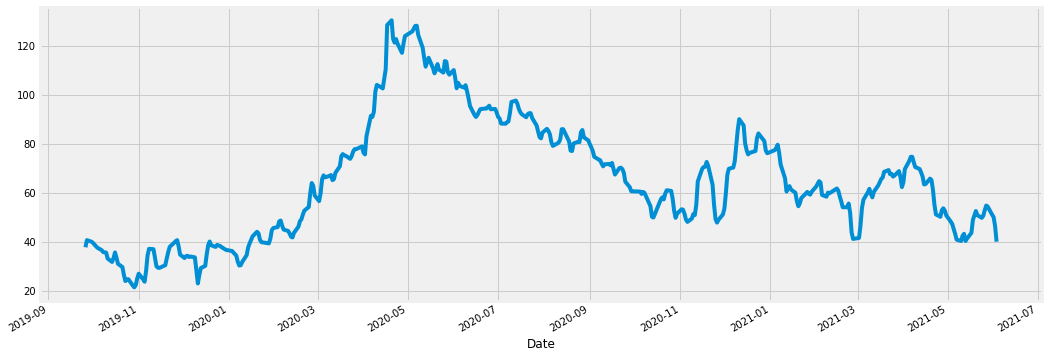

In [40]:
# The new stationary plot
decomposed_samsung_volume.trend.diff().plot()

# <a id='4'>4. Modelling using statstools</a>

## <a id='4.1'>4.1 AR models</a>
**AR models**은 자기자신을 종속변수(Dependent Variable) $y_t$로 하고, 이전 시점의 시계열(Lagged Data)인 $[y_{t-1},y_{t-2},...,y_{t-p}]$를 독립변수(Independent Variable)로 갖는 모델을 의미합니다. 즉 간단히 이야기하면 AR Model은 변수의 과거 값들의 선형 조합을 이용하여 현재 시점의 값을 예측하는 모델을 의미합니다.

차수 $p$의 자기회귀모델은 다음과 같이 표현할 수 있습니다. 

$
y_t = c + \Phi_{1} y_{t-1} + \Phi_{2} y_{t-2} + ... + \Phi_{p} y_{t-p} + \epsilon_{t}
$

위의 식에서 $\epsilon_{t}$는 White Noise 입니다.
식을 풀어보자면 현재 시점의 값 $y_t$를 예측함에 있어서 이전 시점의 Lagged된 Data에 매개변수 $\Phi$가 곱해진 값과 White Noise 값이 더해진 형태의 다중 회귀 모델이라고 볼 수 있습니다. 이처럼 차수 $p$를 가지는 자기회귀 모델을 **AR(p) Model**이라고 부릅니다. 

#### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 
 만약 ϕ = 1이면, 이것은 랜덤워크이며, ϕ = 0이라면, 이것은 화이트 노이즈입니다.
 만약 -1 < ϕ < 1이면, 이것은 정상성을 가지는 데이터이며,ϕ가 -ve라면, men reversion이 존재한다고 볼 수 있습니다.
 마지막으로 ϕ가 +ve라면, momentum이 존재한다고 할 수 있습니다..
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

## Simulating AR(1) model

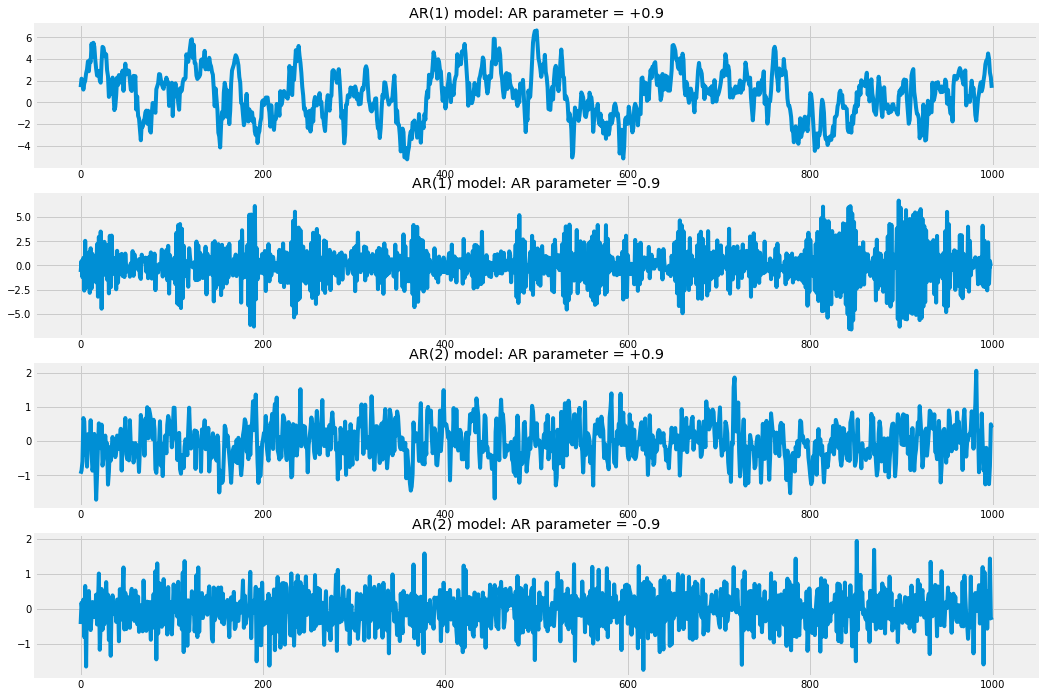

In [41]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

## Forecasting a simulated model

In [42]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41570D+00    |proj g|=  4.00791D-04

At iterate    5    f=  1.41570D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   2.220D-08   1.416D+00
  F =   1.4157012841488492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observati

 This problem is unconstrained.


ϕ는 0.9 정도로 첫번째 시뮬레이션 모델인 AR(1), MA(1) 모델의 AR parameter와 근사합니다.

## Predicting the models

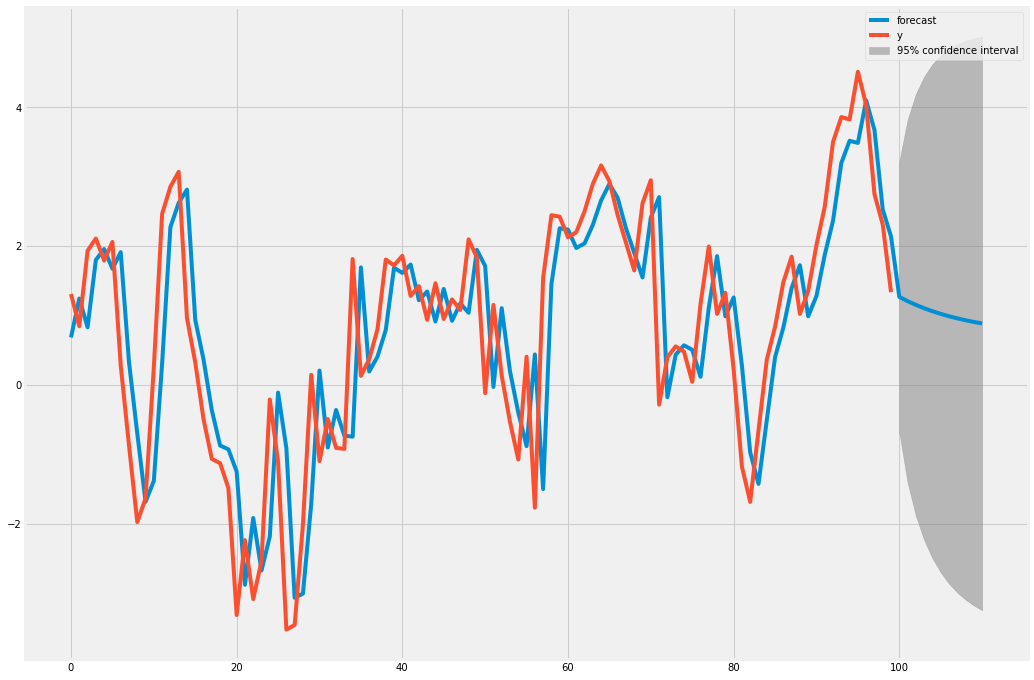

In [43]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [44]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054613286923.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32512D+00    |proj g|=  1.03029D-05

At iterate    5    f=  8.32512D+00    |proj g|=  1.11910D-05

At iterate   10    f=  8.32512D+00    |proj g|=  1.01075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     19      1     0     0   0.000D+00   8.325D+00
  F =   8.3251221080980251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


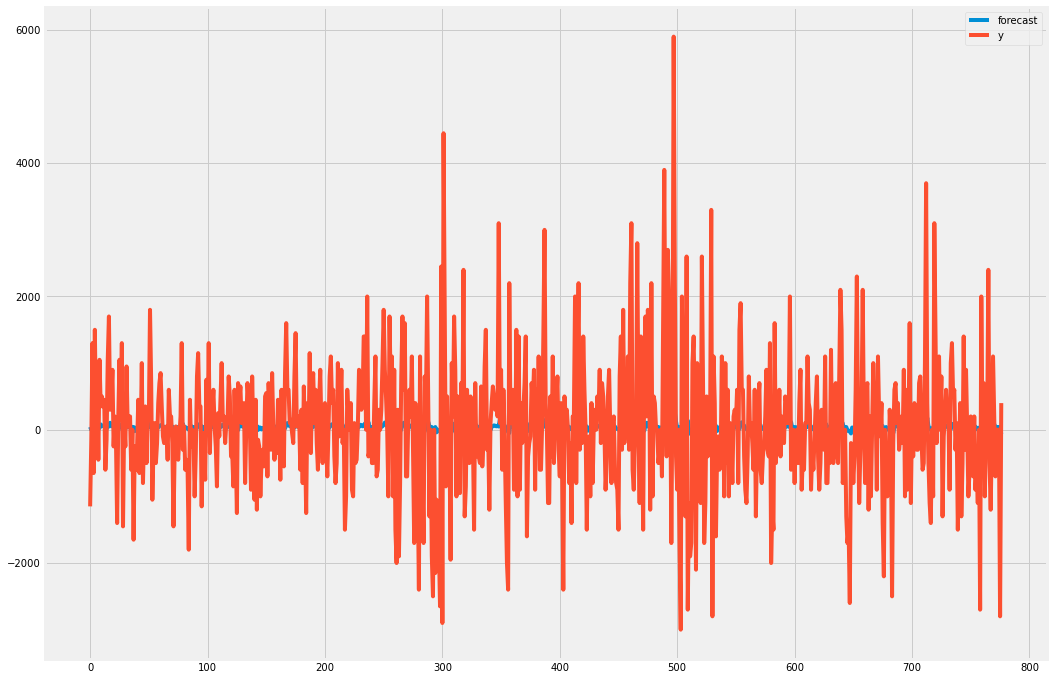

In [45]:
# Predicting closing prices of samsung
sam = ARMA(samsung["Close"].diff().iloc[1:].values, order=(1,0))
res = sam.fit()
res.plot_predict()
plt.show()

더 좋은 모델이 필요해 보입니다.

## <a id='4.2'>4.2 MA models</a>
**Moving Average(MA) models**이란 자기자신을 종속변수(Dependent Variable) $y_t$로 하고, 해당 시점과 그 과거의 White Noise Distribution Error들인 $[\epsilon_{t-1},\epsilon_{t-2},...,\epsilon_{t-p}]$를 독립변수(Independent Variable)로 갖는 모델을 의미합니다. 회귀에서 목표 예상 변수의 과거 값을 이용하는 대신에 이동 평균 모델은 회귀처럼 보이는 모델에서 과거 예측 오차(Forecast Error)을 사용합니다.

차수 $q$의 이동평균모델은 다음과 같이 표현할 수 있습니다. 

$
y_t = c + \epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + ... + \theta_{q} \epsilon_{t-q}
$

여기서 $\epsilon_{t}$는 White Noise 입니다. 식을 풀어보자면 $y_t$의 각 값을 과거 몇개의 예측 오차의 가중 이동 평균으로 생각할 수 있다고 해석할 수 있습니다. 이처럼 $q$ 차 이동 평균 모델을 **MA(q) Model**이라고 부릅니다. 

#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

이것은 랜덤워크 이론의 수식과 유사하게 해석가능합니다.
Today's returns = mean + today's noise + yesterday's noise

## Simulating MA(1) model

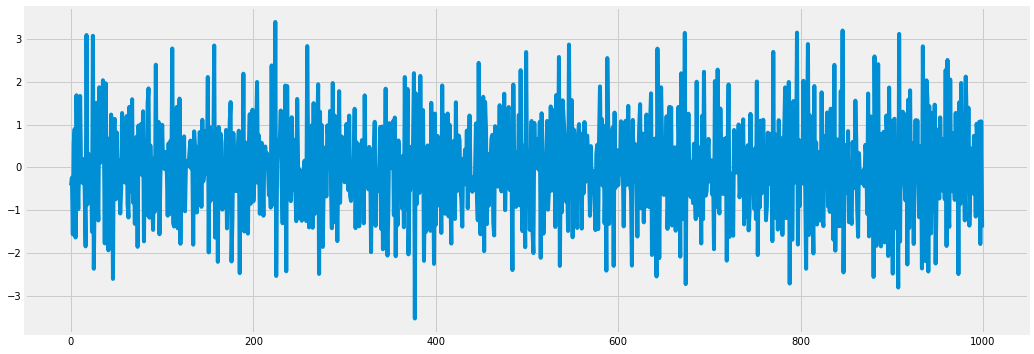

In [46]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Forecasting the simulated MA model

In [47]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42328D+00    |proj g|=  9.15179D-04

At iterate    5    f=  1.42328D+00    |proj g|=  2.95564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     12      1     0     0   0.000D+00   1.423D+00
  F =   1.4232763120971135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observati

 This problem is unconstrained.


## Prediction using MA models

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32514D+00    |proj g|=  9.23706D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   0.000D+00   8.325D+00
  F =   8.3251395713526009     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


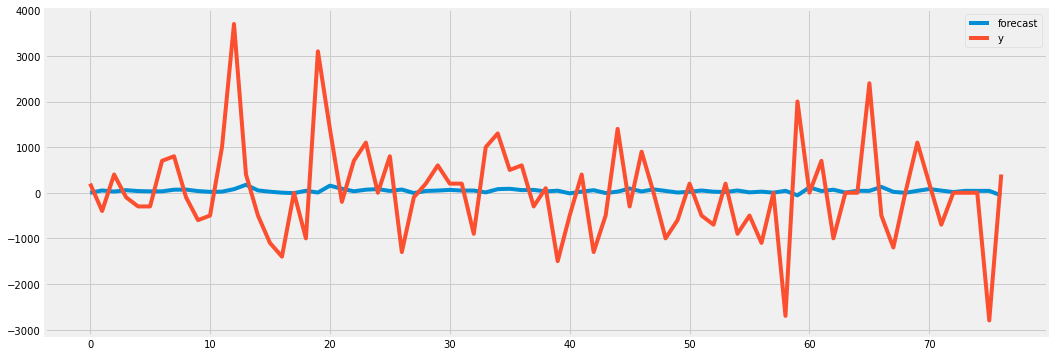

In [48]:
# Predicting closing prices of samsung
sam = ARMA(samsung["Close"].diff().iloc[1:].values, order=(0,1))
res = sam.fit()
res.plot_predict(start=700)
plt.show()

## <a id='4.3'>4.3 ARMA models</a>

**Autoregressive–moving-average (ARMA) models**은 자기자신을 종속변수(Dependent Variable) $y_t$로 하고, 이전 시점의 시계열 데이터(Lagged Data)인 $[y_{t-1}, y_{t-2}, ..., y_{t-p}]$와 White Noise $[\epsilon_{t-1},\epsilon_{t-2},...,\epsilon_{t-p}]$를 독립변수(Independent Variable)로 갖는 모델을 의미합니다. 

p와 q 차원을 가지는 ARMA Model의 수식은 다음과 같습니다.

$
y_t = \theta_{0} + \theta_{1} y_{t-1} + \theta_{2} y_{t-2} + ... + \theta_{p} y_{t-p} + \epsilon_{t} + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} +...+ \theta_{q} \epsilon_{t-q}
$

### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70842D+01    |proj g|=  7.08322D-02

At iterate    5    f=  1.70835D+01    |proj g|=  5.24523D-03

At iterate   10    f=  1.70835D+01    |proj g|=  2.89333D-03

At iterate   15    f=  1.70835D+01    |proj g|=  2.46239D-03

At iterate   20    f=  1.70835D+01    |proj g|=  1.81934D-03

At iterate   25    f=  1.70835D+01    |proj g|=  6.37819D-03

At iterate   30    f=  1.70835D+01    |proj g|=  1.98952D-05

At iterate   35    f=  1.70835D+01    |proj g|=  6.03961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/junghwan/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  777
Model:                     ARMA(3, 3)   Log Likelihood              -13273.894
Method:                       css-mle   S.D. of innovations        6341105.282
Date:                Fri, 04 Mar 2022   AIC                          26563.789
Time:                        17:11:25   BIC                          26601.032
Sample:                             0   HQIC                         26578.116
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6847.9022    5.5e+04      0.124      0.901   -1.01e+05    1.15e+05
ar.L1.y       -0.6404      0.059    -10.809      0.000      -0.756      -0.524
ar.L2.y       -0.7186      0.056    -12.865      0.0

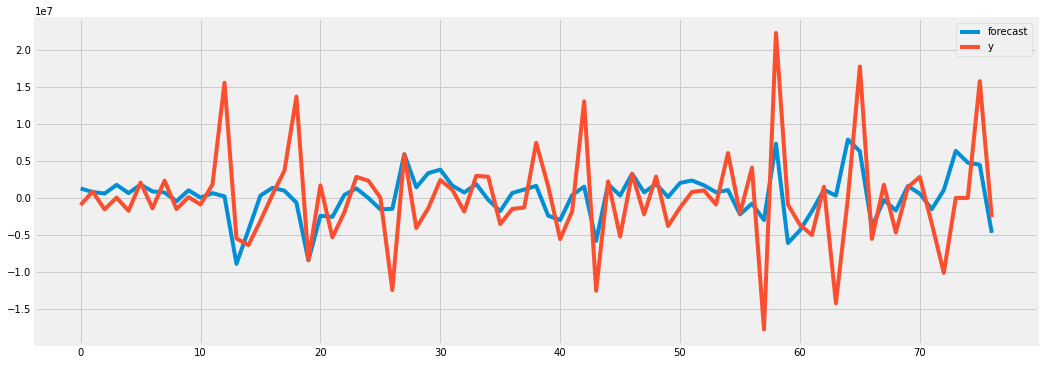

In [49]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(samsung["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=700)
plt.show()

In [50]:
rmse = math.sqrt(mean_squared_error(samsung["Volume"].diff().iloc[700:-1].values, result.predict(start=700)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 9001901.130082583.


ARMA model이 AR이나 MA models에 비해서 좋은 결과를 보여줌을 확인하 수 있습니다.

## <a id='4.4'>4.4 ARIMA models</a>

기존 AR, MA, ARMA 모델의 경우 데이터가 정상 (Stationary)이어야 함으로 비정상 (Nonstationary)인 경우는 차분 (differencing)을 통해 데이터를 정상으로 변형해주어야 합니다. ARIMA는 ARMA 모형에 차분을 d회 수행해준 모델입니다.

**ARIMA는 Autoregressive Integrated Moving Average의 약자**로 이동 평균을 누적한 자기 회귀 즉 자기 회귀와 이동 평균 모델을 결합한 모델입니다. 수식은 아래와 같이 나타낼 수 있습니다.

$
y_t' = c+ \Phi_{1} y_{t-1}' + \Phi_{2} y_{t-2}' + ... + \Phi_{p} y_{t-p}' + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} +...+ \theta_{q} \epsilon_{t-q} + \epsilon_t
$

위의 식에서 $y_t'$는 차분을 구한 시계열이며, 우변의 예측 변수에는 $y_t$의 시차 값과 시차 오차(lagged error)를 둘 다 포함합니다. 위와 같은 모델을 **ARIMA(p,d,q)** 모델이라고 부르며 각 변수 $p,d,q$는 다음과 같은 의미를 가집니다.

- $p$ = 자기 회귀 부분의 차수
- $d$ = 1차 차분이 포함된 정도
- $q$ = 이동 평균 부분의 차수

자기 회귀(AR)과 이동 평균 모델(MA)에 사용되는 것과 같은 정상성과 가역성 조건은 ARIMA 모델에도 적용됩니다. 지금까지 다룬 모델을 ARIMA 모델로 표현하는 것도 가능합니다.

- **White Noise :** ARIMA(0,0,0)
- **확률 보행 :** 상수가 없는 ARIMA(0,1,0)
- **표류를 포함하는 확률보행 :** 상수가 있는 ARIMA(0,1,0)
- **AR :** ARIMA(p,0,0)
- **MA :** ARIMA(0,0,q)

## Prediction using ARIMA model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74009D+01    |proj g|=  4.66471D-04

At iterate    5    f=  1.74009D+01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   0.000D+00   1.740D+01
  F =   17.400943139847588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observati

 This problem is unconstrained.


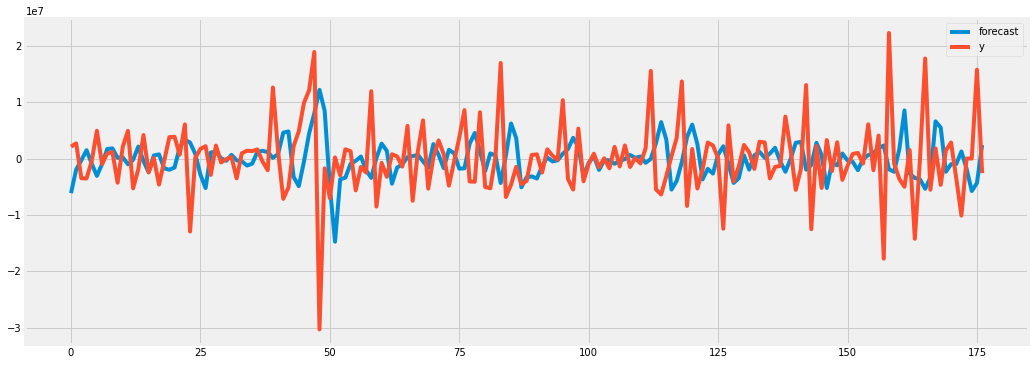

In [51]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(samsung["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=600)
plt.show()

In [52]:
rmse = math.sqrt(mean_squared_error(samsung["Volume"].diff().iloc[601:].values, result.predict(start=600)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 8851423.698888911.


약간의 lag를 고려하면 이정도면 괜찮은 모델입니다!

## <a id='4.5'>4.5 VAR models</a>

**VAR 모델**은 예측할 변수의 과거 값 뿐 만 아니라 예측할 변수와 의존성이 있는 변수들까지 고려하여 선형 함수로 나타내는 확률적인 과정입니다. ARIMA 모델보다 다변량의 효과를 모델링한 모형으로 일변량 분석인 ARIMA 모델은 변수들 사이 상호작용을 무시하는 반면 다변량 분석 방법인 VAR 모델은 이를 고려합니다.

예측 뿐만 아니라 특정 변수의 일시적 충격에 대한 효과를 모델링하기 위해서 연립 방정식 체계로 구성된 VAR 모델을 사용하며 어떤 변수가 변할 때 내생 변수에 미치는 효과를 분석하는 충격 반응 분석을 가능하게 하며, 분산 분해를 통해 각각 내생 변수의 변동 중에 이들 변수들이 전체 변동에 기여한 부분이 어느 정도인지 상대적인 크기 분석도 가능합니다.

/home/junghwan/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/home/junghwan/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                  777
Model:                     VARMA(2,1)   Log Likelihood              -13331.456
                          + intercept   AIC                          26696.911
Date:                Fri, 04 Mar 2022   BIC                          26776.054
Time:                        17:11:28   HQIC                         26727.356
Sample:                             0                                         
                                - 777                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):       255.40, 114.81
Prob(Q):                        0.99, 0.98   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.99, 2.84   Skew:                       0.51, 0.18
Prob(H) (two-sided):            0.00,

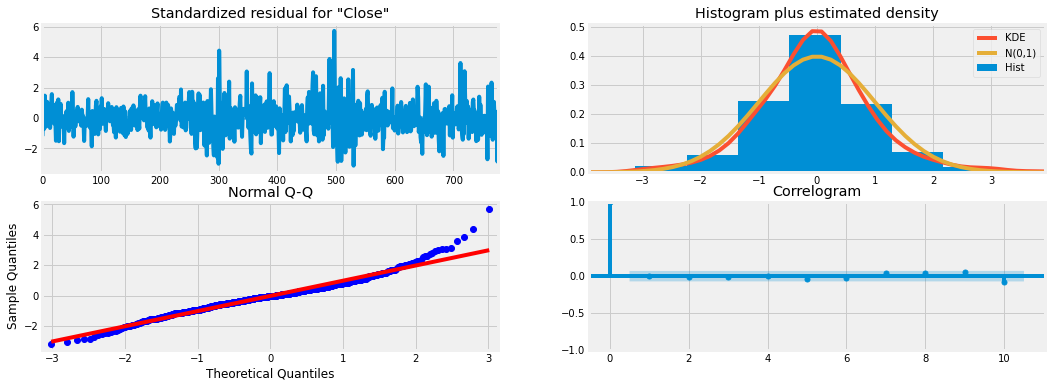

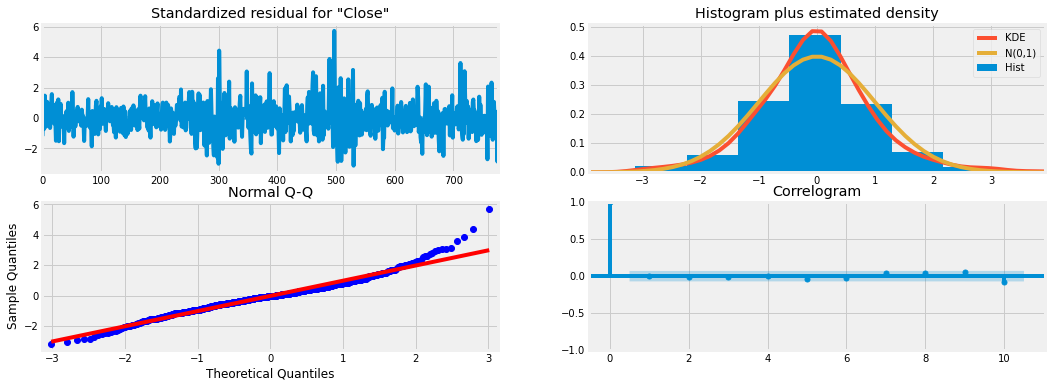

In [53]:
# Predicting closing price of samsung and hynix
train_sample = pd.concat([samsung["Close"].diff().iloc[1:],hynix["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0)
result.plot_diagnostics()

In [54]:
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[:].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1781.9516599445953.


## <a id='4.6'>4.6 State Space methods</a>

일반적인 state space model은 아래와 같은 형태입니다.

y<sub>t</sub>=Z<sub>t</sub>α<sub>t</sub>+d<sub>t</sub>+ε<sub>t</sub>

α<sub>t</sub>=T<sub>t</sub>α<sub>t</sub>−1+c<sub>t</sub>+R<sub>t</sub>η<sub>t</sub>

y<sub>t</sub> 는 시간 t에서의 관측 벡터를 의미하며, α<sub>t</sub> 시간 t에서의 관측되지 않는 상태 벡터를 의미합니다.

ε<sub>t</sub>∼N(0,H<sub>t</sub>)

η<sub>t</sub>∼N(0,Q<sub>t</sub>)

남은 변수는 아래와 같으며,
(Z<sub>t</sub>,d<sub>t</sub>,H<sub>t</sub>,T<sub>t</sub>,c<sub>t</sub>,R<sub>t</sub>,Q<sub>t</sub>) 각각의 변수들은 과정을 설명하기 위한 변수들입니다.

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

## <a id='4.6.1'>4.6.1 SARIMA models</a>
SARIMA models은 주기성(Seasonality)를 갖는 시계열 모형입니다. ARMA 모형이나 ARIMA 모형이 주기성을 갖는 경우 자기상관성을 분석하면 주기를 검측할 수 있습니다. 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  777
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -6462.018
Date:                Fri, 04 Mar 2022   AIC                          12944.035
Time:                        17:11:31   BIC                          12990.590
Sample:                             0   HQIC                         12961.944
                                - 777                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.7425     55.441      0.735      0.462     -67.919     149.404
ar.L1         -0.0196      0.042     -0.463      0.643      -0.103       0.063
ar.L2          0.4875      0.045     10.938      0.0

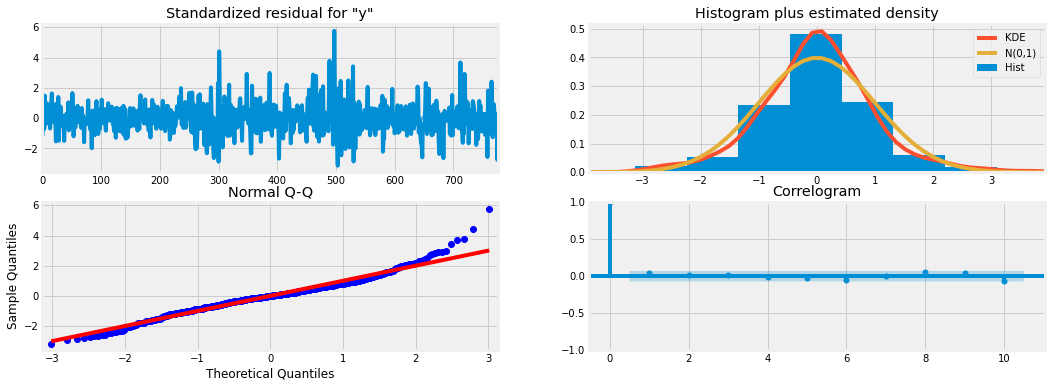

In [55]:
# Predicting closing price of samsung
train_sample = samsung["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

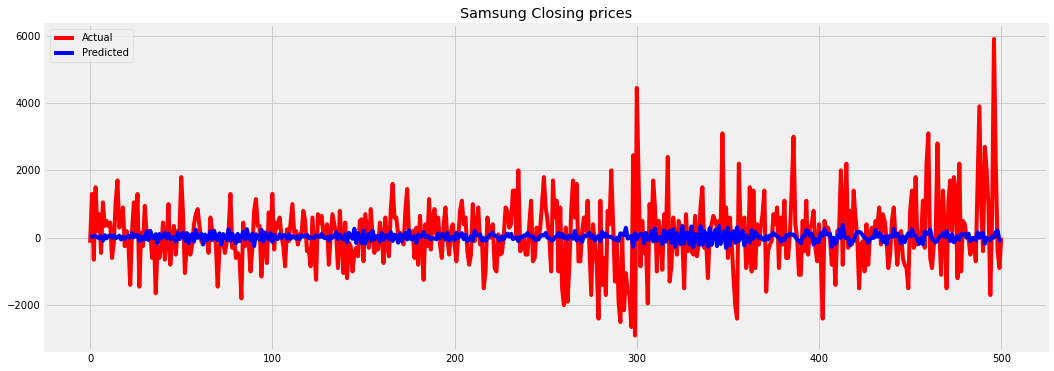

In [56]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Samsung Closing prices')
plt.show()

## <a id='4.6.2'>4.6.2 Unobserved components</a>
UCM 은 시계열 데이터를 Trend, Season, Cycle, Regression Effect를 고려하여 분해하는 방법입니다. 
아래의 모델이 가능한 시나리오를 보여줍니다.
<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">
Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  777
Model:                    local level   Log Likelihood               -6463.986
Date:                Fri, 04 Mar 2022   AIC                          12931.971
Time:                        17:11:31   BIC                          12941.279
Sample:                             0   HQIC                         12935.552
                                - 777                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  9.997e+05   3.41e+04     29.346      0.000    9.33e+05    1.07e+06
sigma2.level       4.53e-06     21.078   2.15e-07      1.000     -41.311      41.311
Ljung-Box (L1) (Q):         

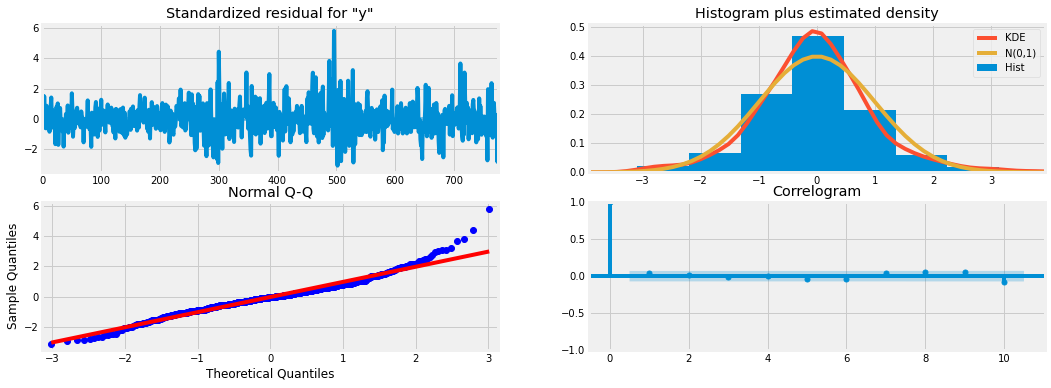

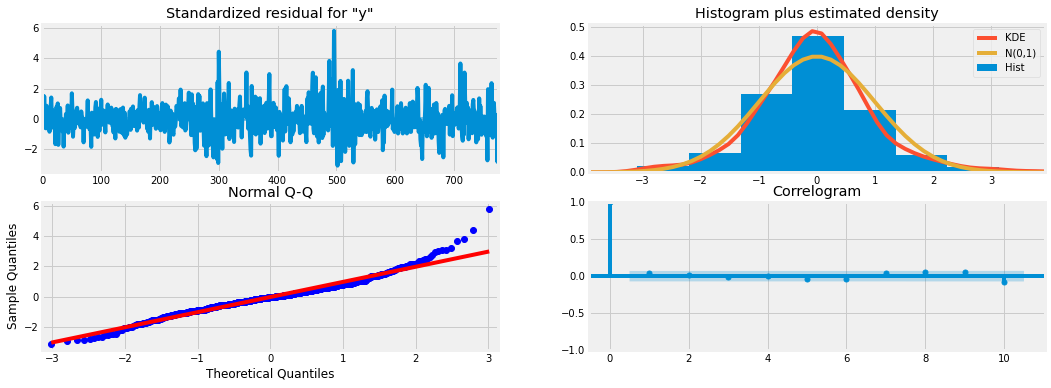

In [57]:
# Predicting closing price of samsung
train_sample = samsung["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()

In [58]:
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 985.7443633743356.


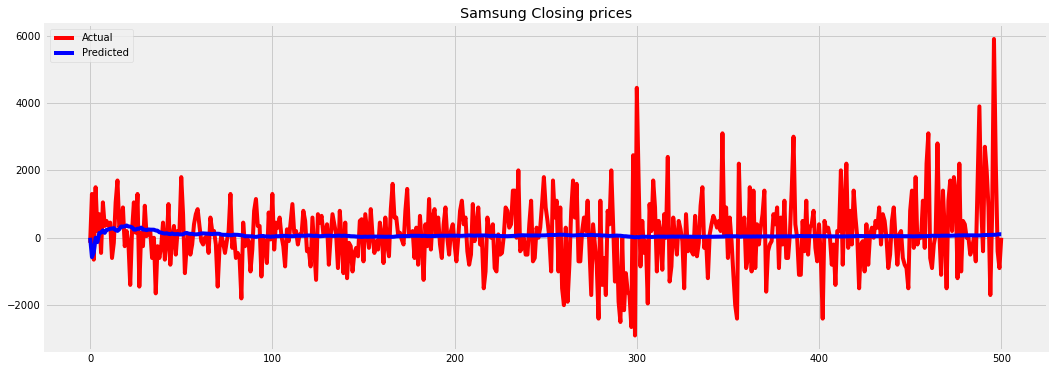

In [59]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Samsung Closing prices')
plt.show()

## <a id='4.6.3'>4.6.3 Dynamic Factor models</a>

/home/junghwan/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                  777
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -13341.626
Date:                               Fri, 04 Mar 2022   AIC                          26695.252
Time:                                       17:11:35   BIC                          26723.185
Sample:                                            0   HQIC                         26705.997
                                               - 777                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):             3.07, 0.73   Jarque-Bera (JB):       273.31, 157.57
Prob(Q):                        0.08, 0.39   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.93, 2.86   Skew:                       0.51, 0

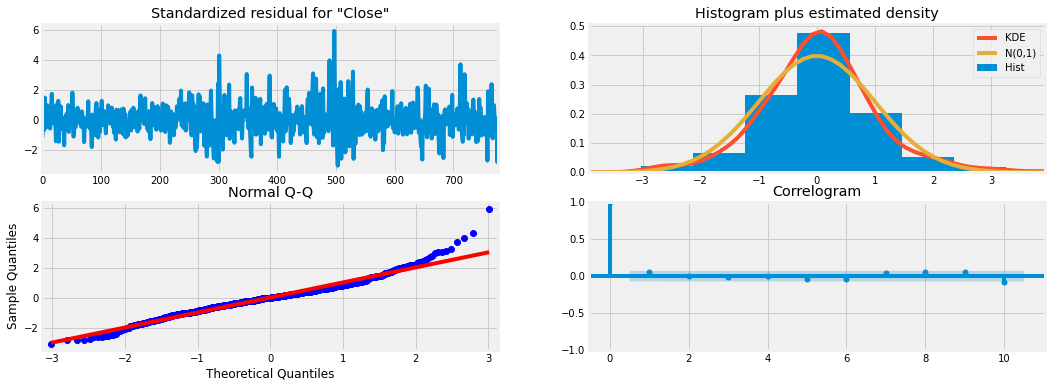

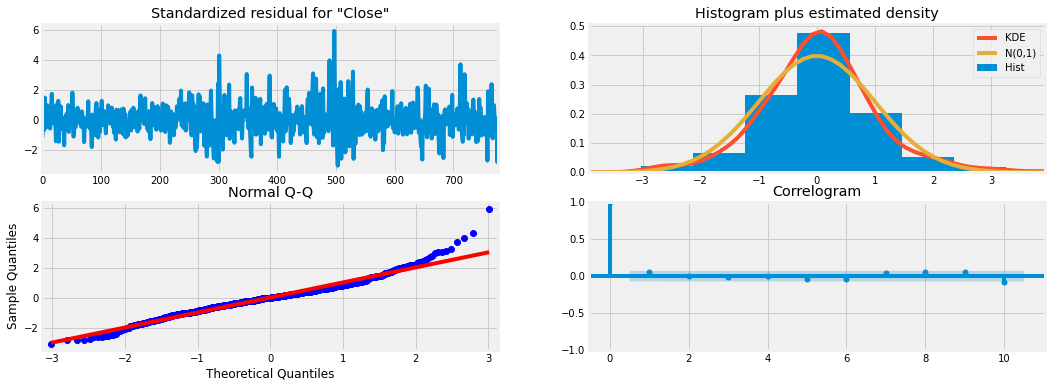

In [60]:
# Predicting closing price of samsung and hynix
train_sample = pd.concat([samsung["Close"].diff().iloc[1:],hynix["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict()
result.plot_diagnostics()

In [61]:
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[:].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1785.8963908272801.


### References and influences: 
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)